# Getting the audio files
* We send request with urllib.request

In [1]:
# import urllib.request
# urllib.request.urlretrieve ("https://goo.gl/8hY5ER","a.tar.gz")
import tarfile
tar = tarfile.open("a.tar.gz")
tar.extractall()
tar.close()

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from tqdm import tqdm

# Metadata DataFrame View

In [3]:
data=pd.read_csv("UrbanSound8K/metadata/UrbanSound8K.csv")
data.head()

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.0,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.5,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.5,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.0,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.5,72.500000,1,5,2,children_playing


# Sample Visualisation

In [4]:
### Let's read a sample audio using librosa
import librosa
audio_file_path='/content/UrbanSound8K/audio/fold1/101415-3-0-2.wav'
librosa_audio_data,librosa_sample_rate=librosa.load(audio_file_path)

In [5]:
print(librosa_audio_data)

[-0.00011662 -0.00017163 -0.00017833 ... -0.04541198 -0.04675572
 -0.05040179]


In [6]:
"""
def create_spectrogram(y):
  spec = librosa.feature.melspectrogram(y=y)
  spec_conv = librosa.amplitude_to_db(spec, ref=np.max)
  return spec_conv
"""

'\ndef create_spectrogram(y):\n  spec = librosa.feature.melspectrogram(y=y)\n  spec_conv = librosa.amplitude_to_db(spec, ref=np.max)\n  return spec_conv\n'

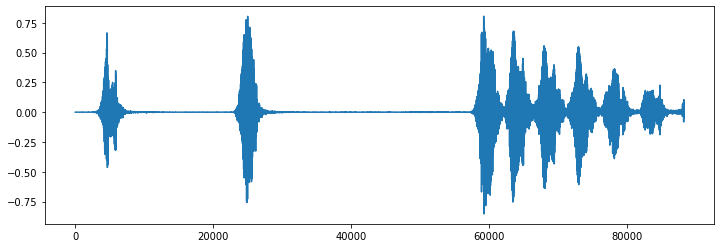

In [7]:
###  plot the librosa audio data
import matplotlib.pyplot as plt
# Original audio with 1 channel 
plt.figure(figsize=(12, 4))
plt.plot(librosa_audio_data)

## Read with Scipy

In [8]:
from scipy.io import wavfile as wav
wave_sample_rate, wave_audio = wav.read(audio_file_path) 

In [9]:
wave_audio

array([   -5,    -5,    -6, ..., -1576, -1566, -1557], dtype=int16)

## Original audio with 2 channel

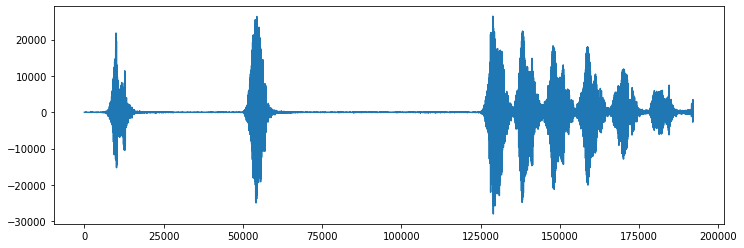

In [10]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 4))
plt.plot(wave_audio)

In [11]:
mfccs = librosa.feature.mfcc(y=librosa_audio_data, sr=librosa_sample_rate, n_mfcc=40)
print(mfccs.shape)

(40, 173)


In [12]:
mfccs

array([[-5.21320618e+02, -5.19244873e+02, -5.18639771e+02, ...,
        -4.35682465e+02, -3.92686127e+02, -3.53734650e+02],
       [ 1.43376465e+01,  1.71779118e+01,  1.81039009e+01, ...,
         1.13759216e+02,  1.51305222e+02,  1.78508270e+02],
       [ 1.35261917e+01,  1.61207390e+01,  1.72592888e+01, ...,
         6.42746277e+01,  6.28374176e+01,  5.72559586e+01],
       ...,
       [ 3.53906393e-01, -3.32358456e+00, -4.83565140e+00, ...,
        -5.26991272e+00, -1.14964163e+00, -2.76052785e+00],
       [ 4.51929927e-01, -3.06704044e+00, -4.64729738e+00, ...,
        -3.42241073e+00,  2.55063629e+00,  2.86859894e+00],
       [ 4.35776591e-01, -2.79775834e+00, -4.41259766e+00, ...,
        -2.67133570e+00,  1.37135601e+00, -4.06251371e-01]], dtype=float32)

In [13]:
audio_dataset_path ='UrbanSound8K/audio/'
metadata=pd.read_csv('UrbanSound8K/metadata/UrbanSound8K.csv')
metadata.head()

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.0,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.5,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.5,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.0,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.5,72.500000,1,5,2,children_playing


In [14]:
def features_extractor(file):
    audio, sample_rate = librosa.load(file_name, res_type='kaiser_fast') 
    mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
    mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)
    
    return mfccs_scaled_features

## Feature Extraction

* We divides the data by extracting the characteristics of the frequencies

In [15]:
### Now we iterate through every audio file and extract features 
### using Mel-Frequency Cepstral Coefficients
extracted_features=[]
for index_num,row in tqdm(metadata.iterrows()):
    file_name = os.path.join(os.path.abspath(audio_dataset_path),'fold'+str(row["fold"])+'/',str(row["slice_file_name"]))
    final_class_labels=row["classID"]
    data=features_extractor(file_name)
    extracted_features.append([data,final_class_labels])

3555it [05:13, 10.39it/s]/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=1323
  n_fft, y.shape[-1]
8325it [12:07, 16.49it/s]/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=1103
  n_fft, y.shape[-1]
/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=1523
  n_fft, y.shape[-1]
8732it [12:40, 11.47it/s]


In [16]:
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

## Our Final DataFrame

In [17]:
extracted_features_df=pd.DataFrame(extracted_features,columns=['feature','class'])
extracted_features_df.head()

,feature,class
0,"[-214.95764, 70.502464, -130.70279, -53.116936...",3
1,"[-423.7311, 109.2299, -52.872597, 60.827538, 0...",2
2,"[-458.52844, 121.35432, -46.535675, 51.969467,...",2
3,"[-413.63254, 101.61351, -35.43868, 53.047146, ...",2
4,"[-446.38693, 113.68634, -52.4572, 60.349724, 2...",2


In [18]:
# Our features and label.
X=np.array(extracted_features_df['feature'].tolist())
y=np.array(extracted_features_df['class'].tolist())

In [19]:
X.shape

(8732, 40)

In [20]:
# Label Encoding
y=np.array(pd.get_dummies(y))

In [21]:
y.shape

(8732, 10)

In [22]:
### Train/Test/Val Split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)
X_test , X_val , y_test , y_val = train_test_split(X_test,y_test , test_size = 0.5 , random_state =0)

In [23]:
print(f"X_train---------: {X_train}")
print(f"y---------------: {y}")
print(f"X_train.shape: {X_train.shape}")
print(f"X_test.shape: {X_test.shape}")
print(f"X_val.shape: {X_val.shape}")
print(f"y_test.shape: {y_test.shape}")

X_train---------: [[-1.3082390e+02  1.1256225e+02 -2.2600878e+01 ...  3.2528090e+00
  -1.3692100e+00  2.7386472e+00]
 [-1.3446434e+01  9.1048195e+01 -7.8661475e+00 ... -3.2665925e+00
  -5.2884049e+00 -1.5532947e+00]
 [-4.9575279e+01  2.3543632e-01 -2.0504959e+01 ...  2.8775635e+00
  -1.5828822e+00  3.5109408e+00]
 ...
 [-4.2677444e+02  9.2583252e+01  3.3174915e+00 ...  7.9330575e-01
   7.1890563e-01  7.1397936e-01]
 [-1.4541722e+02  1.3619025e+02 -3.3450352e+01 ...  1.4591718e+00
  -1.9928970e+00 -8.9318532e-01]
 [-4.2099823e+02  2.1074756e+02  3.5814040e+00 ... -5.4054899e+00
  -3.3959770e+00 -1.5590971e+00]]
y---------------: [[0 0 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 ...
 [0 1 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]]
X_train.shape: (6985, 40)
X_test.shape: (873, 40)
X_val.shape: (874, 40)
y_test.shape: (873, 10)


# Modelling Time

In [24]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten
from tensorflow.keras.optimizers import Adam
from sklearn import metrics

In [25]:
# This will be our output layer dense
num_labels=y.shape[1]

In [26]:
model=Sequential()
# First layer
model.add(Dense(200,input_shape=(40,)))
model.add(Activation('relu'))
model.add(Dropout(0.5))
# Second layer
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
# Third layer
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
# Last layer
model.add(Dense(num_labels))
model.add(Activation('softmax'))

In [27]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 200)               8200      
                                                                 
 activation (Activation)     (None, 200)               0         
                                                                 
 dropout (Dropout)           (None, 200)               0         
                                                                 
 dense_1 (Dense)             (None, 512)               102912    
                                                                 
 activation_1 (Activation)   (None, 512)               0         
                                                                 
 dropout_1 (Dropout)         (None, 512)               0         
                                                                 
 dense_2 (Dense)             (None, 512)               2

In [28]:
model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='adam')

In [29]:
from tensorflow.keras.callbacks import ModelCheckpoint

num_epochs = 750
num_batch_size = 32
checkpointer = ModelCheckpoint(filepath='saved_models/audio_classification.hdf5', 
                               verbose=1, save_best_only=True)

model.fit(X_train, y_train, batch_size=num_batch_size, epochs=num_epochs, validation_data=(X_val, y_val), callbacks=[checkpointer], verbose=1)


Epoch 1/750
209/219 [===========================>..] - ETA: 0s - loss: 7.3778 - accuracy: 0.1882
Epoch 1: val_loss improved from inf to 2.09193, saving model to saved_models/audio_classification.hdf5
219/219 [==============================] - 4s 5ms/step - loss: 7.1665 - accuracy: 0.1894 - val_loss: 2.0919 - val_accuracy: 0.3124
Epoch 2/750
216/219 [============================>.] - ETA: 0s - loss: 2.2011 - accuracy: 0.2620
Epoch 2: val_loss improved from 2.09193 to 1.85229, saving model to saved_models/audio_classification.hdf5
219/219 [==============================] - 1s 4ms/step - loss: 2.1993 - accuracy: 0.2614 - val_loss: 1.8523 - val_accuracy: 0.4577
Epoch 3/750
206/219 [===========================>..] - ETA: 0s - loss: 1.8806 - accuracy: 0.3421
Epoch 3: val_loss improved from 1.85229 to 1.60160, saving model to saved_models/audio_classification.hdf5
219/219 [==============================] - 1s 4ms/step - loss: 1.8784 - accuracy: 0.3427 - val_loss: 1.6016 - val_accuracy: 0.5366

In [30]:
test_accuracy=model.evaluate(X_test,y_test,verbose=0)
print(test_accuracy[1])

0.8533791303634644


In [31]:
# Done